# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [2]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
    
    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.deck = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.deck) * 0.2), int(len(self.deck) * 0.8))
        self.deck.insert(self.plastic_card_position, 'Plastic')
    
    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count
    
    def _shuffle_deck(self):
        random.shuffle(self.deck)
    
    def draw_card(self):
        if not self.deck:
            self.deck = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.deck) * 0.2), int(len(self.deck) * 0.8))
            self.deck.insert(self.plastic_card_position, 'Plastic')
        return self.deck.pop(0)

deck = Deck()
print(deck.draw_card())
print(deck.draw_card())

3 of Clubs
5 of Clubs


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [3]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def bet(self, amount):
        self.chips -= amount

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_hand(self, deck):
        while self.hand_value < 17:
            self.hit(deck)
        self.stand()

deck = Deck()
player = Player("Player 1")
dealer = Dealer()

player.receive_card(deck.draw_card())
player.receive_card(deck.draw_card())
dealer.receive_card(deck.draw_card())
dealer.receive_card(deck.draw_card())

player.hit(deck)
dealer.play_hand(deck)

print(f"Player 1's hand: {player.hand}, hand value: {player.hand_value}")
print(f"Dealer's hand: {dealer.hand}, hand value: {dealer.hand_value}")


Player 1's hand: [3 of Clubs, 3 of Spades, Ace of Clubs], hand value: 17
Dealer's hand: [King of Clubs, Ace of Clubs], hand value: 21


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [4]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class Game:
    def __init__(self):
        self.deck = Deck()
        self.players = [Player("Dealer 1"), Player("Dealer 2"), Player("Dealer 3")]
        self.round_number = 0

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())

    def play_round(self):
        self.round_number += 1
        print(f"\n--- Round {self.round_number} ---")
        self.deck = Deck()
        self.deal_initial_cards()

        for player in self.players:
            while player.hand_value < 17:
                player.hit(self.deck)
            player.stand()

        for player in self.players:
            print(f"{player.name}'s hand: {player.hand}, hand value: {player.hand_value}")
            if player.is_bust():
                print(f"{player.name} busted!")
            player.reset_hand()

game = Game()

for _ in range(3):
    game.play_round()



--- Round 1 ---
Dealer 1's hand: [King of Clubs, Ace of Hearts], hand value: 21
Dealer 2's hand: [7 of Spades, 5 of Diamonds, 8 of Clubs], hand value: 20
Dealer 3's hand: [Ace of Hearts, 2 of Spades, 5 of Spades], hand value: 18

--- Round 2 ---
Dealer 1's hand: [6 of Clubs, Queen of Diamonds, 5 of Hearts], hand value: 21
Dealer 2's hand: [7 of Diamonds, 8 of Diamonds, Queen of Hearts], hand value: 25
Dealer 2 busted!
Dealer 3's hand: [9 of Spades, 3 of Spades, Ace of Clubs, 7 of Hearts], hand value: 20

--- Round 3 ---
Dealer 1's hand: [9 of Clubs, 2 of Hearts, 5 of Spades, 5 of Spades], hand value: 21
Dealer 2's hand: [3 of Spades, King of Spades, 8 of Diamonds], hand value: 21
Dealer 3's hand: [Ace of Clubs, 8 of Hearts], hand value: 19


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [7]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

# Deck class definition
class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class CardCountingPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)
        self.card_count = 0

    def update_card_count(self, card):
        if card.value in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def receive_card(self, card):
        super().receive_card(card)
        self.update_card_count(card)

    def decide_action(self, deck):
        threshold = 0
        if self.card_count <= threshold and not self.is_bust():
            self.hit(deck)
        else:
            self.stand()

class Game:
    def __init__(self):
        self.deck = Deck()
        self.players = [Player("Dealer"), CardCountingPlayer("Card Counter")]
        self.round_number = 0

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())

    def play_round(self):
        self.round_number += 1
        print(f"\n--- Round {self.round_number} ---")
        self.deck = Deck()
        self.deal_initial_cards()

        for player in self.players:
            print(f"\n{player.name}'s turn:")
            while not player.is_stand and not player.is_bust():
                if isinstance(player, CardCountingPlayer):
                    player.decide_action(self.deck)
                else:
                    if player.hand_value < 17:
                        player.hit(self.deck)
                    else:
                        player.stand()
                print(f"{player.name} decides to {'stand' if player.is_stand else 'hit'}, hand value now {player.hand_value}")

            if player.is_bust():
                print(f"{player.name} busts with hand value {player.hand_value}!")
            else:
                print(f"{player.name} stands with hand value {player.hand_value}.")

        for player in self.players:
            player.reset_hand()

game = Game()

for _ in range(3):
    game.play_round()



--- Round 1 ---

Dealer's turn:
Dealer decides to hit, hand value now 22
Dealer busts with hand value 22!

Card Counter's turn:
Card Counter decides to hit, hand value now 16
Card Counter decides to hit, hand value now 19
Card Counter decides to hit, hand value now 27
Card Counter busts with hand value 27!

--- Round 2 ---

Dealer's turn:
Dealer decides to hit, hand value now 19
Dealer decides to stand, hand value now 19
Dealer stands with hand value 19.

Card Counter's turn:
Card Counter decides to hit, hand value now 19
Card Counter decides to stand, hand value now 19
Card Counter stands with hand value 19.

--- Round 3 ---

Dealer's turn:
Dealer decides to hit, hand value now 23
Dealer busts with hand value 23!

Card Counter's turn:
Card Counter decides to hit, hand value now 30
Card Counter busts with hand value 30!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [9]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class CardCountingPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)
        self.card_count = 0

    def update_card_count(self, card):
        if card.value in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def receive_card(self, card):
        super().receive_card(card)
        self.update_card_count(card)

    def decide_action(self, deck):
        threshold = 0
        if self.card_count <= threshold and not self.is_bust():
            self.hit(deck)
        else:
            self.stand()

class Game:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.players = [CardCountingPlayer("Strategy Player"), Player("Dealer"), Player("Player 2"), Player("Player 3")]
        self.round_number = 0
        self.verbose = verbose

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())

    def play_round(self):
        self.round_number += 1
        self.deck = Deck()
        self.deal_initial_cards()

        for player in self.players:
            while not player.is_stand and not player.is_bust():
                if isinstance(player, CardCountingPlayer):
                    player.decide_action(self.deck)
                else:
                    if player.hand_value < 17:
                        player.hit(self.deck)
                    else:
                        player.stand()

        dealer_hand_value = self.players[1].hand_value  # Assuming dealer is always the second player in the list
        for player in self.players:
            if player.name != "Dealer":
                if player.hand_value > 21 or (dealer_hand_value <= 21 and dealer_hand_value > player.hand_value):
                    player.chips -= 100  # Player loses bet
                elif player.hand_value > dealer_hand_value or dealer_hand_value > 21:
                    player.chips += 100 
                    
        for player in self.players:
            player.reset_hand()

    def play(self, rounds=50):
        for _ in range(rounds):
            self.round_number += 1
            self.play_round()
            if self.players[0].chips <= 0:
                if self.verbose:
                    print("Strategy Player is out of money.")
                break

game = Game(verbose=False)
game.play()

print(f"Final chip counts after {game.round_number} rounds:")
for player in game.players:
    print(f"{player.name}: {player.chips}")

Final chip counts after 68 rounds:
Strategy Player: 0
Dealer: 1000
Player 2: 900
Player 3: 1400


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Average Net Winnings: -283.1
Standard Deviation: 148.18026184347227
Probability of Net Winning: 0.01
Probability of Net Loss: 0.98


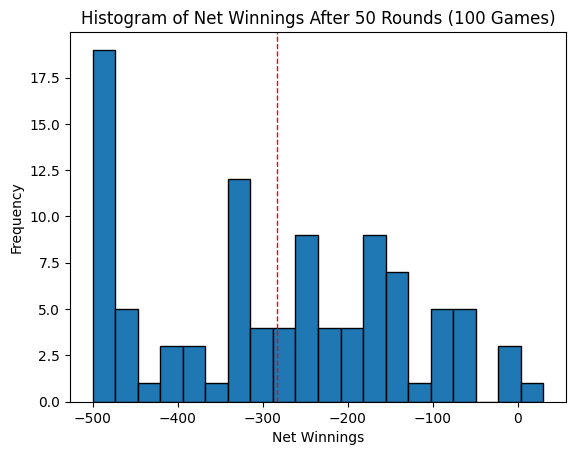

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class CardCountingPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)
        self.card_count = 0

    def update_card_count(self, card):
        if card.value in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def receive_card(self, card):
        super().receive_card(card)
        self.update_card_count(card)

    def decide_action(self, deck):
        threshold = 0
        if self.card_count <= threshold and not self.is_bust():
            self.hit(deck)
        else:
            self.stand()

class Game:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.players = [CardCountingPlayer("Strategy Player", 1000), Player("Dealer", 1000), Player("Player 2", 1000), Player("Player 3", 1000)]
        self.round_number = 0
        self.verbose = verbose

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())
    def play_round(self):
        self.deck = Deck()
        self.deal_initial_cards()

        for player in self.players:
            while not player.is_stand and not player.is_bust():
                if isinstance(player, CardCountingPlayer):
                    player.decide_action(self.deck)
                else:
                    if player.hand_value < 17:
                        player.hit(self.deck)
                    else:
                        player.stand()

        dealer = self.players[1]
        dealer_hand_value = dealer.hand_value
        bet_amount = 10
    
        for player in self.players:
            if player != dealer:
                if player.hand_value > 21:
                    player.chips -= bet_amount
                elif dealer_hand_value > 21 or dealer_hand_value < player.hand_value:
                    player.chips += bet_amount
                elif player.hand_value < dealer_hand_value and dealer_hand_value <= 21:
                    player.chips -= bet_amount

        for player in self.players:
            player.reset_hand()

    def play(self, rounds=50):
        for _ in range(rounds):
            self.play_round()

winnings = []
for _ in range(100):
    game = Game(verbose=False)
    game.play()
    winnings.append(game.players[0].chips)

average_winnings = np.mean(winnings) - 1000
std_dev = np.std(winnings)
probability_net_win = sum(w > 1000 for w in winnings) / len(winnings)
probability_net_loss = sum(w < 1000 for w in winnings) / len(winnings)

# Results
print(f"Average Net Winnings: {average_winnings}")
print(f"Standard Deviation: {std_dev}")
print(f"Probability of Net Winning: {probability_net_win}")
print(f"Probability of Net Loss: {probability_net_loss}")

# Histogram
net_winnings = [w - 1000 for w in winnings]
plt.hist(net_winnings, bins=20, edgecolor='black')
plt.title('Histogram of Net Winnings After 50 Rounds (100 Games)')
plt.xlabel('Net Winnings')
plt.ylabel('Frequency')
plt.axvline(average_winnings, color='red', linestyle='dashed', linewidth=1)
plt.show()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class CardCountingPlayer(Player):
    def __init__(self, name, chips=1000, threshold=0):
        super().__init__(name, chips)
        self.card_count = 0
        self.threshold = threshold

    def update_card_count(self, card):
        if card.value in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def receive_card(self, card):
        super().receive_card(card)
        self.update_card_count(card)

    def decide_action(self, deck):
        if self.card_count <= self.threshold and not self.is_bust():
            self.hit(deck)
        else:
            self.stand()

class Game:
    def __init__(self, card_counting_threshold=0, verbose=False):
        self.deck = Deck()
        self.players = [CardCountingPlayer("Strategy Player", 1000, card_counting_threshold), 
                        Player("Dealer", 1000), 
                        Player("Player 2", 1000), 
                        Player("Player 3", 1000)]
        self.round_number = 0
        self.verbose = verbose

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())
    def play_round(self):
        self.deck = Deck()
        self.deal_initial_cards()

        for player in self.players:
            while not player.is_stand and not player.is_bust():
                if isinstance(player, CardCountingPlayer):
                    player.decide_action(self.deck)
                else:
                    if player.hand_value < 17:
                        player.hit(self.deck)
                    else:
                        player.stand()

        dealer = self.players[1]
        dealer_hand_value = dealer.hand_value
        bet_amount = 10
    
        for player in self.players:
            if player != dealer:
                if player.hand_value > 21:
                    player.chips -= bet_amount
                elif dealer_hand_value > 21 or dealer_hand_value < player.hand_value:
                    player.chips += bet_amount
                elif player.hand_value < dealer_hand_value and dealer_hand_value <= 21:
                    player.chips -= bet_amount

        for player in self.players:
            player.reset_hand()

    def play(self, rounds=50):
        for _ in range(rounds):
            self.play_round()


thresholds = [-5, -2, 0, 2, 5]
results = []

for threshold in thresholds:
    winnings = []
    for _ in range(100):
        game = Game(verbose=False)
        game.players[0] = CardCountingPlayer("Strategy Player", 1000, threshold)
        game.play()
        winnings.append(game.players[0].chips - 1000)  # Calculate net winnings
    average_winnings = np.mean(winnings)
    std_dev = np.std(winnings)
    results.append((threshold, average_winnings, std_dev))

average_winnings = np.mean(winnings) - 1000 
std_dev = np.std(winnings)
probability_net_win = sum(w > 1000 for w in winnings) / len(winnings)
probability_net_loss = sum(w < 1000 for w in winnings) / len(winnings)

# Result
print(f"Average Net Winnings: {average_winnings}")
print(f"Standard Deviation: {std_dev}")
print(f"Probability of Net Winning: {probability_net_win}")
print(f"Probability of Net Loss: {probability_net_loss}")

for threshold, avg, std in results:
    print(f"Threshold: {threshold}, Average Net Winnings: {avg}, Std Dev: {std}")

# optimal value 2

Average Net Winnings: -1384.2
Standard Deviation: 123.16801532865583
Probability of Net Winning: 0.0
Probability of Net Loss: 1.0
Threshold: -5, Average Net Winnings: -186.6, Std Dev: 110.45560194032714
Threshold: -2, Average Net Winnings: -237.6, Std Dev: 132.3413767496772
Threshold: 0, Average Net Winnings: -308.6, Std Dev: 150.7250476861759
Threshold: 2, Average Net Winnings: -318.4, Std Dev: 141.75838599532656
Threshold: 5, Average Net Winnings: -384.2, Std Dev: 123.16801532865583


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, deck_count=6):
        self.deck_count = deck_count
        self.cards = self._create_deck()
        self._shuffle_deck()
        self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
        self.cards.insert(self.plastic_card_position, 'Plastic')

    def _create_deck(self):
        return [Card(suit, value) for suit in self.suits for value in self.values] * self.deck_count

    def _shuffle_deck(self):
        random.shuffle(self.cards)

    def draw_card(self):
        card = self.cards.pop(0)
        if card == 'Plastic':
            self.cards = self._create_deck()
            self._shuffle_deck()
            self.plastic_card_position = random.randint(int(len(self.cards) * 0.2), int(len(self.cards) * 0.8))
            self.cards.insert(self.plastic_card_position, 'Plastic')
            card = self.cards.pop(0)
        return card

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

    def receive_card(self, card):
        self.hand.append(card)
        self.calculate_hand_value()

    def calculate_hand_value(self):
        self.hand_value = 0
        ace_count = 0
        for card in self.hand:
            if card.value.isdigit():
                self.hand_value += int(card.value)
            elif card.value in ['Jack', 'Queen', 'King']:
                self.hand_value += 10
            else:
                ace_count += 1
                self.hand_value += 11
        while self.hand_value > 21 and ace_count:
            self.hand_value -= 10
            ace_count -= 1

    def hit(self, deck):
        if self.is_playing:
            self.receive_card(deck.draw_card())

    def stand(self):
        self.is_playing = False
        self.is_stand = True

    def is_bust(self):
        return self.hand_value > 21

    def reset_hand(self):
        self.hand = []
        self.hand_value = 0
        self.is_playing = True
        self.is_stand = False

class CardCountingPlayer(Player):
    def __init__(self, name, chips=1000, threshold=0):
        super().__init__(name, chips)
        self.card_count = 0
        self.threshold = threshold

    def update_card_count(self, card):
        if card.value in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def receive_card(self, card):
        super().receive_card(card)
        self.update_card_count(card)

    def decide_action(self, deck):
        if self.card_count <= self.threshold and not self.is_bust():
            self.hit(deck)
        else:
            self.stand()

class SimpleStrategyPlayer(Player):
    def decide_action(self, deck, dealer_up_card_value):
        if self.hand_value <= 11:
            self.hit(deck)
        elif self.hand_value >= 17:
            self.stand()
        elif 12 <= self.hand_value <= 16:
            if dealer_up_card_value >= 7:
                self.hit(deck)
            else:
                self.stand()

class Game:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.players = [SimpleStrategyPlayer("Simple Strategy Player", 1000), 
                        Player("Dealer", 1000), 
                        Player("Player 2", 1000), 
                        Player("Player 3", 1000)]
        self.round_number = 0
        self.verbose = verbose

    def deal_initial_cards(self):
        for player in self.players:
            player.receive_card(self.deck.draw_card())
            player.receive_card(self.deck.draw_card())
            
    def play_round(self):
        self.deck = Deck()  # Shuffle, Reset
        self.deal_initial_cards()

        dealer_up_card = self.players[1].hand[0]  # Assuming the dealer is always the second player
        dealer_up_card_value = self.get_card_value(dealer_up_card)  # Convert card to value

        for player in self.players:
            if isinstance(player, SimpleStrategyPlayer):
                player.decide_action(self.deck, dealer_up_card_value)
            else:
                while not player.is_stand and not player.is_bust():
                    if player.hand_value < 17:
                        player.hit(self.deck)
                    else:
                        player.stand()

        dealer_hand_value = self.get_hand_value(self.players[1].hand)  # Get dealer hand value
        for player in self.players:
            if player != self.players[1]:
                player_hand_value = self.get_hand_value(player.hand)
                if player_hand_value > 21:
                    player.chips -= 10
                elif dealer_hand_value > 21 or player_hand_value > dealer_hand_value:  # Dealer busts or player hand is higher
                    player.chips += 10
                elif player_hand_value < dealer_hand_value:  # Dealer hand is higher
                    player.chips -= 10
                    
        for player in self.players:
            player.reset_hand()

    
    def get_hand_value(self, hand):
        """Calculates the total value of a hand."""
        value = 0
        aces = 0
        for card in hand:
            if card.value in ['Jack', 'Queen', 'King']:
                value += 10
            elif card.value == 'Ace':
                value += 11
                aces += 1
            else:
                value += int(card.value)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

    def get_card_value(self, card):
        """Helper function to convert a card to its value for comparison."""
        if card.value in ['Jack', 'Queen', 'King']:
            return 10
        elif card.value == 'Ace':
            return 11
        else:
            return int(card.value)

    def play(self, rounds=50):
        for _ in range(rounds):
            self.play_round()


results = []

winnings = []
for _ in range(100):  # Run 100 games
    game = Game(verbose=False)
    game.play()
    winnings.append(game.players[0].chips - 1000)  # Calculate net winnings for the Simple Strategy Player

average_winnings = np.mean(winnings)
std_dev = np.std(winnings)
results.append(("Simple Strategy", average_winnings, std_dev))

# Results
print(f"Average Net Winnings: {average_winnings}")
print(f"Standard Deviation: {std_dev}")
print(f"Probability of Net Winning: {probability_net_win}")
print(f"Probability of Net Loss: {probability_net_loss}")

for strategy, avg, std in results:
    print(f"Strategy: {strategy}, Average Net Winnings: {avg}, Std Dev: {std}")

# optimal value 2

Average Net Winnings: -40.9
Standard Deviation: 70.98020850913302
Probability of Net Winning: 0.0
Probability of Net Loss: 1.0
Strategy: Simple Strategy, Average Net Winnings: -40.9, Std Dev: 70.98020850913302
